In [2]:
import pandas as pd
data = pd.read_excel('merge.xlsx')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [17]:
#匯入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#LogisticRegression
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import random

In [18]:
#設定xy
x=data.iloc[:,:12]
y=data["wine"]
# x
# y

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42)

In [20]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
preds_knn=knn.predict(x_test)

In [10]:
print(classification_report(y_test,preds_knn,target_names=["red","white"]))

              precision    recall  f1-score   support

         red       0.93      0.86      0.89       341
       white       0.95      0.98      0.96       959

    accuracy                           0.95      1300
   macro avg       0.94      0.92      0.93      1300
weighted avg       0.95      0.95      0.95      1300



In [12]:
print(knn.score(x_train,y_train))
print(accuracy_score(y_test,preds_knn))

0.9588223975370406
0.9461538461538461


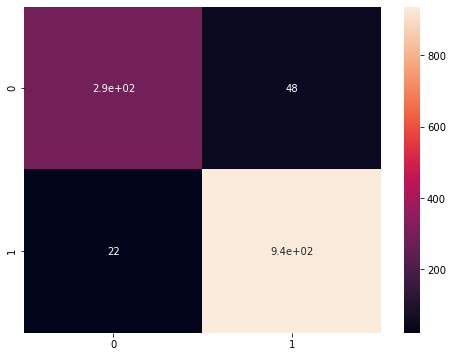

In [13]:
cm=confusion_matrix(y_test,preds_knn)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.show()